In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('hospital_admissions.csv')
df

,admissions
0,92
1,85
2,80
3,87
4,79
5,82
6,89
7,83
8,80
9,87


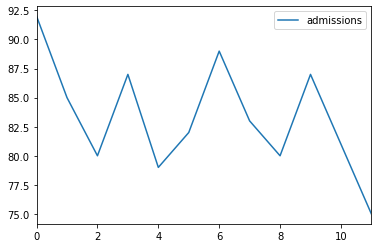

In [3]:
df.plot()
plt.show()

In [13]:
# compute moving average as time lag 3
moving_avg=df.rolling(3).mean()
moving_avg

,admissions
0,NaN
1,NaN
2,85.666667
3,84.000000
4,82.000000
5,82.666667
6,83.333333
7,84.666667
8,84.000000
9,83.333333


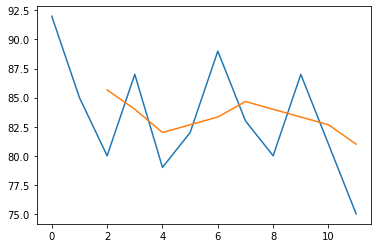

In [14]:
plt.plot(df)
plt.plot(moving_avg)
plt.show()

In [22]:
# compute moving averages by taking period from 2 to n/2
# find best RMSE among all these

ls=[]
for i in range(2,int(len(df)/2)+1):
    moving_avg=df.rolling(i).mean()
    diff=df-moving_avg
    diff.dropna(inplace=True)
    rmse=np.sqrt((diff**2).sum(axis=0)/len(diff))
    ls.append((rmse[0],i))
ls

[(3.0562900861844073, 2),
 (3.9200340134578786, 3),
 (3.181980515339464, 4),
 (3.9705163392183622, 5),
 (4.160471584991755, 6)]

In [23]:
best_rmse=min(ls)[0]
best_lag=min(ls)[1]
print('for given data,best-suited lag is ',best_lag,'with RMSE=',best_rmse)

for given data,best-suited lag is  2 with RMSE= 3.0562900861844073


In [25]:
ideal_moving_avg=df.rolling(best_lag).mean()

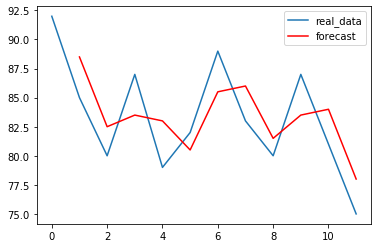

In [26]:
plt.plot(df,label='real_data')
plt.plot(ideal_moving_avg,color='red',label='forecast')
plt.legend()